In [33]:
import os
import pandas as pd
import numpy as np
#
import nltk
import nltk.corpus
#
from nltk import word_tokenize
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import CFG
from nltk.parse.generate import generate
#
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [62]:
text1 = 'Titanic was a big ship having many people across the world'
text2 = 'One of the biggest tragedies happened with Titanic'
text3 = 'No ship was made so big like Titanic after that tragedy'
lemmatized = []
stemmed = []
y = np.array([1,0,1]).reshape(3,1)

In [3]:
text = [ text1,text2,text3]
for sent in text :
    for word in word_tokenize(sent):
        stemmed.append(stemmer.stem(word))
        lemmatized.append(lemmatizer.lemmatize(word))
        
        

In [7]:
lemmatized

['Titanic',
 'wa',
 'a',
 'big',
 'ship',
 'having',
 'many',
 'people',
 'across',
 'the',
 'world',
 'One',
 'of',
 'the',
 'biggest',
 'tragedy',
 'happened',
 'with',
 'Titanic',
 'No',
 'ship',
 'wa',
 'made',
 'so',
 'big',
 'like',
 'Titanic',
 'after',
 'that',
 'tragedy']

In [10]:
pos_txt1 = nltk.pos_tag(word_tokenize(text1))
pos_txt2 = nltk.pos_tag(word_tokenize(text2))
pos_txt3 = nltk.pos_tag(word_tokenize(text3))


        
        

In [11]:
pos_txt1

[('Titanic', 'NNP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('big', 'JJ'),
 ('ship', 'NN'),
 ('having', 'VBG'),
 ('many', 'JJ'),
 ('people', 'NNS'),
 ('across', 'IN'),
 ('the', 'DT'),
 ('world', 'NN')]

In [12]:
pos_txt2

[('One', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('biggest', 'JJS'),
 ('tragedies', 'NNS'),
 ('happened', 'VBD'),
 ('with', 'IN'),
 ('Titanic', 'NNP')]

In [13]:
pos_txt3

[('No', 'DT'),
 ('ship', 'NN'),
 ('was', 'VBD'),
 ('made', 'VBN'),
 ('so', 'RB'),
 ('big', 'JJ'),
 ('like', 'IN'),
 ('Titanic', 'NNP'),
 ('after', 'IN'),
 ('that', 'DT'),
 ('tragedy', 'NN')]

In [46]:
def cfg_parser(pos):
    for one in pos:
        if one[1] == 'NNP':
            s_NP = "\'" + one[0] + "\'"
        if one[1] == 'VBD' or one[1] == 'VBN':
            s_V = "\'" + one[0] + "\'"
        if one[1] == 'NN':
            s_N = "\'" + one[0] + "\'"
        else:
            s_N = ""
    cfg_grammar = nltk.CFG.fromstring("""
                                      S -> NP VP
                                      VP -> V N
                                      NP -> {}
                                      V -> {}
                                      N -> {}
                                      """.format(s_NP,s_V,s_N)
                                      )
    for sentence in generate(cfg_grammar):
        print(" ".join(sentence))
    return " ".join(sentence)

In [47]:
cfg_txt1 = cfg_parser(pos_txt1)

Titanic was world


In [48]:
cfg_txt2 =cfg_parser(pos_txt2)

Titanic happened


In [49]:
cfg_txt3 =cfg_parser(pos_txt3)

Titanic made tragedy


In [50]:
cfg_txt1

'Titanic was world'

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(text)

In [52]:
X_names = count_vect.get_feature_names()
X_names

['across',
 'after',
 'big',
 'biggest',
 'happened',
 'having',
 'like',
 'made',
 'many',
 'no',
 'of',
 'one',
 'people',
 'ship',
 'so',
 'that',
 'the',
 'titanic',
 'tragedies',
 'tragedy',
 'was',
 'with',
 'world']

In [53]:
df = pd.DataFrame(X_counts.toarray(),columns=X_names)
df

,across,after,big,biggest,happened,having,like,made,many,no,...,ship,so,that,the,titanic,tragedies,tragedy,was,with,world
0,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,1,0
2,0,1,1,0,0,0,1,1,0,1,...,1,1,1,0,1,0,1,1,0,0


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')
tf_matrix = tf_vect.fit_transform(text)

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [55]:
tf_matrix.shape

(3, 11)

In [56]:
tf_names = tf_vect.get_feature_names()

In [57]:
tf_names

['big',
 'biggest',
 'happened',
 'having',
 'like',
 'people',
 'ship',
 'titanic',
 'tragedies',
 'tragedy',
 'world']

In [58]:
tf_df = pd.DataFrame(tf_matrix.toarray(),columns=tf_names)

In [59]:
tf_df

,big,biggest,happened,having,like,people,ship,titanic,tragedies,tragedy,world
0,0.358291,0.000000,0.000000,0.47111,0.000000,0.47111,0.358291,0.278245,0.000000,0.000000,0.47111
1,0.000000,0.546454,0.546454,0.00000,0.000000,0.00000,0.000000,0.322745,0.546454,0.000000,0.00000
2,0.406192,0.000000,0.000000,0.00000,0.534093,0.00000,0.406192,0.315444,0.000000,0.534093,0.00000


In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [64]:
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(tf_df,y,test_size=0.25,random_state = 5)

In [67]:
X_train_cv.shape

(2, 11)

In [69]:
y_train_cv.shape

(2, 1)

In [66]:
lr = LogisticRegression()
lr.fit(X_train_cv,y_train_cv)

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
predict = lr.predict(X_test_cv)

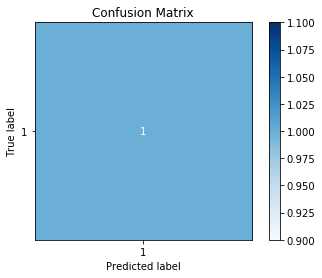

In [72]:
import scikitplot
%matplotlib inline
scikitplot.metrics.plot_confusion_matrix(y_test_cv,predict)

In [74]:
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test_cv,predict))

Accuracy Score :  1.0
